# Chuẩn hóa cơ sở dữ liệu – First Normal Form (1NF)

In [ ]:
# Bảng Transactions_Raw vi phạm chuẩn 1NF vì cột stock_codes chứa nhiều giá trị trong một ô.
# Dòng 1: "VNM, FPT, MWG" (ba mã chứng khoán)
# Dòng 3: "VCB, TCB" (hai mã chứng khoán)
#  vi phạm tính nguyên tử (Atomicity) của chuẩn 1NF.

#### 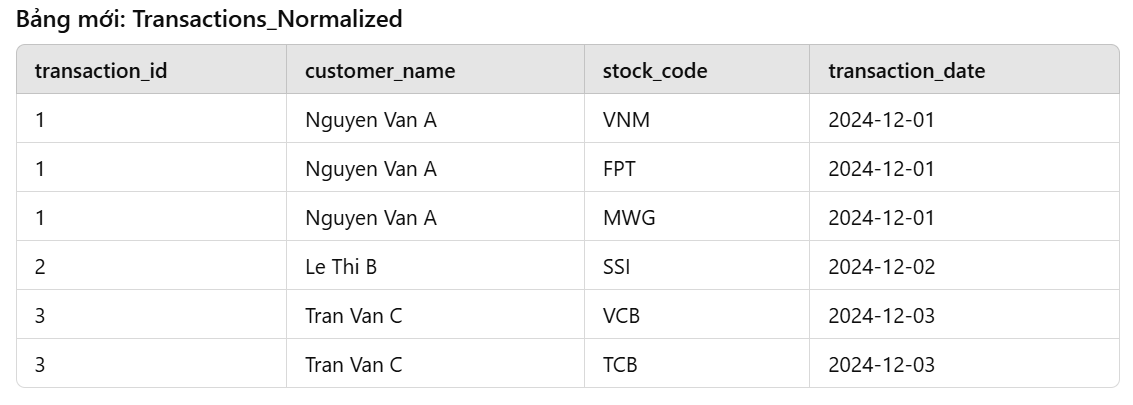

In [ ]:
import mysql.connector

connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="      ",
    database="chuanhoacsdl")
cursor = connection.cursor()

In [ ]:
cursor.execute("""
create table if not exists Customers(
    transaction_id int primary key,
    customer_name varchar(100) not null,
    transaction_date DATE not null)ENGINE=INNODB;
""")

cursor.execute("""
create table if not exists CustomerStocks(
    transaction_id int not null,
    stock_code varchar(10) not null,
    PRIMARY KEY (transaction_id, stock_code),
    FOREIGN KEY(transaction_id) REFERENCES Customers(transaction_id) ) ENGINE = InnoDB;
""")
connection.commit()

In [ ]:
try:
    cursor.execute("""
    INSERT INTO Customers (transaction_id, customer_name , transaction_date)
    VALUES
        (1,'Nguyen Van A', '2024-12-01'),
        (2, 'Le Thi B', '2024-12-02'),
        (3, 'Tran Van C', '2024-12-03');
    """)
    cursor.execute("""
    INSERT INTO CustomerStocks (transaction_id, stock_code)
    VALUES
        (1,'VNM'), (1,'FPT'), (1,'MWG'),
        (2,'SSI'),
        (3, 'VCB'), (3, 'TCB');
    """)
    connection.commit()
    print("Dữ liệu đã chèn thành công!")

except Exception as e:
    connection.rollback()
    print("Lỗi xảy ra:", e)

In [ ]:
#Truy vấn danh sách KH và các mã cổ phiếu tương ứng mà họ đã giao dịch
import pandas as pd
query="""
select c.customer_name, c.transaction_date, s.stock_code
FROM Customers c
JOIN CustomerStocks s ON c.transaction_id = s.transaction_id; """
connection.commit()
data=pd.read_sql_query(query, connection)
data

In [ ]:
# cập nhật tên khách hàng Nguyen Van A thành Nguyen V. A.
cursor.execute("""
UPDATE Customers
SET customer_name= 'Nguyen V. A'
where 1=1
AND customer_name= 'Nguyen Van A';
""")
connection.commit()
query=""" select * from Customers; """
data=pd.read_sql_query(query, connection)
data

In [ ]:
# Xóa mã cổ phiếu MWG khỏi giao dịch của khách hàng Nguyen V. A

cursor.execute("""
DELETE FROM CustomerStocks
WHERE transaction_id = (SELECT transaction_id FROM Customers WHERE customer_name = 'Nguyen V. A')
AND stock_code = 'MWG';
""")
connection.commit()
print("Đã xóa mã MWG khỏi giao dịch của Nguyen V. A.")
query=""" select * from CustomerStocks; """
data=pd.read_sql_query(query, connection)
data


In [ ]:
# Truy vân Đếm số lượng mã cổ phiếu mỗi KH đã giao dịch

query="""
SELECT c.customer_name, s.stock_code, count(s.stock_code)
FROM Customers c
JOIN CustomerStocks s ON c.transaction_id = s.transaction_id
GROUP BY c.customer_name, s.stock_code;
"""
connection.commit()
data = pd.read_sql_query(query,connection)
data

In [ ]:
#Truy vấn tìm KH có giao dịch nhiều mã cổ phiếu nhất

query="""
SELECT c.customer_name, count(s.stock_code) as count_stock
FROM Customers c
JOIN CustomerStocks s ON c.transaction_id = s.transaction_id
GROUP BY c.customer_name
ORDER BY count_stock DESC
"""
connection.commit()
data = pd.read_sql_query(query,connection)
data